In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
df = pd.read_csv('C:/USERS/YASHN/ABALONE PROJECT.CSV')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
df.shape

(4177, 9)

In [6]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [8]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

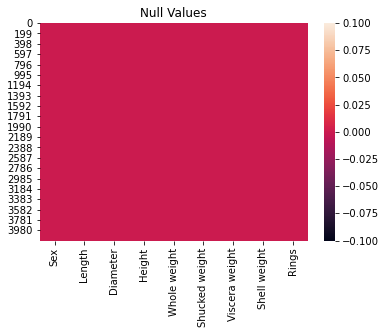

In [9]:
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show

In [10]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Rings'], float64: ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight'], object: ['Sex']}

In [11]:
df[df['Height'] == 0]  #need to drop these rows.

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


In [12]:
df.drop(index=[1257,3996], inplace = True)
df.shape

(4175, 9)

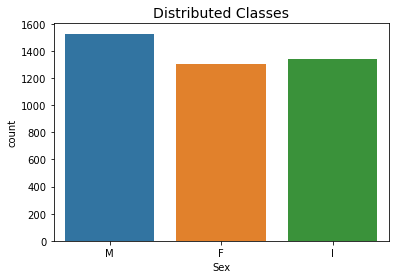

In [13]:
sns.countplot('Sex', data=df)
plt.title('Distributed Classes', fontsize=14)
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='Rings'>

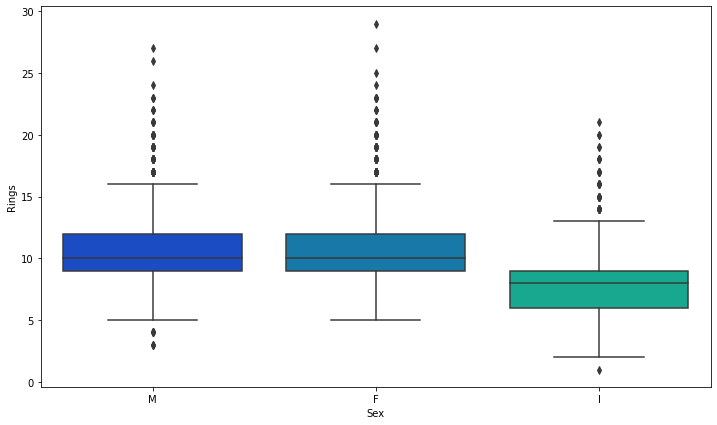

In [15]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Sex',y='Rings',data=df,palette='winter')

In [16]:
print("\nSex Count in Percentage")
print(df.Sex.value_counts(normalize = True))
print("\nSex Count in Numbers")
print(df.Sex.value_counts())


Sex Count in Percentage
M    0.365988
I    0.320958
F    0.313054
Name: Sex, dtype: float64

Sex Count in Numbers
M    1528
I    1340
F    1307
Name: Sex, dtype: int64


array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>],
       [<AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>]], dtype=object)

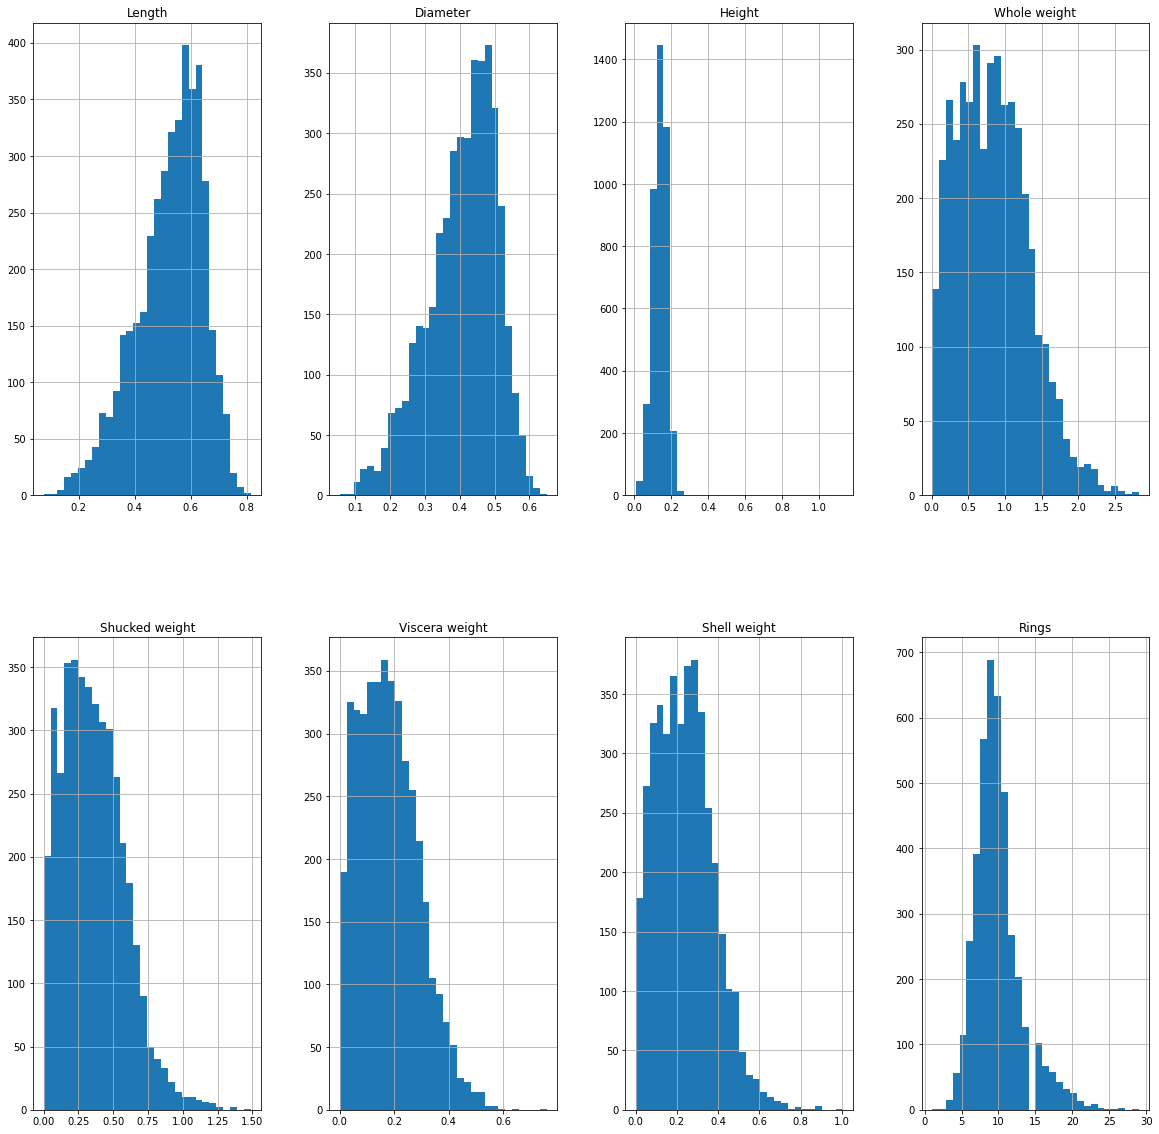

In [17]:
df.hist(figsize=(20,20), grid = True, layout = (2,4), bins = 30)

In [18]:
df.skew()

Length           -0.640993
Diameter         -0.610182
Height            3.166364
Whole weight      0.530549
Shucked weight    0.718735
Viscera weight    0.591455
Shell weight      0.621081
Rings             1.113754
dtype: float64

In [19]:
print("Value Count of Rings Column")
print(df.Rings.value_counts())
print("\nPercentage of Rings Column")
print(df.Rings.value_counts(normalize = True))

Value Count of Rings Column
9     689
10    634
8     567
11    487
7     391
12    267
6     258
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
26      1
29      1
25      1
1       1
2       1
Name: Rings, dtype: int64

Percentage of Rings Column
9     0.165030
10    0.151856
8     0.135808
11    0.116647
7     0.093653
12    0.063952
6     0.061796
13    0.048623
14    0.030180
5     0.027545
15    0.024671
16    0.016048
17    0.013892
4     0.013653
18    0.010060
19    0.007665
20    0.006228
3     0.003593
21    0.003353
23    0.002156
22    0.001437
27    0.000479
24    0.000479
26    0.000240
29    0.000240
25    0.000240
1     0.000240
2     0.000240
Name: Rings, dtype: float64


In [21]:
print(len(df.Rings.unique()))

28


In [22]:
df['Age'] = df['Rings'] + 1.5
df['Age'].head(5)

0    16.5
1     8.5
2    10.5
3    11.5
4     8.5
Name: Age, dtype: float64

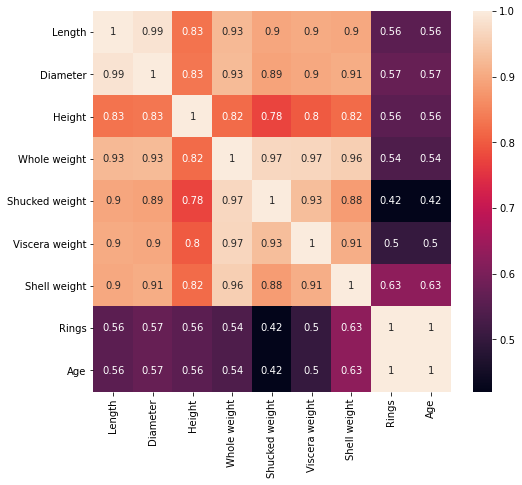

In [23]:
corr_hmap=df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])

In [25]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [26]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.15167461, 0.57527573, 0.43282928, ..., 0.63819465, 1.57107931,
        1.57107931],
       [1.15167461, 1.4498756 , 1.44081267, ..., 1.21292621, 0.91043251,
        0.91043251],
       [1.28041517, 0.04943846, 0.12156159, ..., 0.20714599, 0.29005456,
        0.29005456],
       ...,
       [1.15167461, 0.63250504, 0.67595246, ..., 0.49690017, 0.29005456,
        0.29005456],
       [1.28041517, 0.8407431 , 0.7767508 , ..., 0.41069044, 0.02013442,
        0.02013442],
       [1.15167461, 1.54875252, 1.48233918, ..., 1.84033518, 0.64051238,
        0.64051238]])

In [27]:
threshold=3
print(np.where(z>3))

(array([   6,    6,   72,   72,   81,   83,   83,  129,  163,  164,  165,
        165,  165,  166,  166,  166,  167,  167,  168,  170,  181,  181,
        232,  232,  236,  236,  236,  237,  237,  238,  238,  239,  270,
        270,  275,  275,  277,  278,  278,  294,  294,  310,  310,  313,
        313,  314,  314,  334,  351,  351,  355,  355,  358,  358,  362,
        362,  375,  375,  416,  416,  417,  417,  428,  428,  431,  431,
        433,  433,  469,  469,  478,  478,  480,  480,  501,  501,  526,
        526,  530,  530,  572,  572,  628,  628,  673,  673,  674,  674,
        675,  675,  678,  678,  694,  696,  696,  719,  719,  720,  720,
        744,  744,  754,  754,  756,  756,  811,  811,  891,  891,  891,
       1048, 1051, 1051, 1052, 1193, 1197, 1199, 1202, 1204, 1206, 1206,
       1207, 1207, 1207, 1207, 1209, 1209, 1416, 1416, 1417, 1421, 1425,
       1426, 1426, 1426, 1427, 1428, 1428, 1527, 1753, 1755, 1756, 1758,
       1760, 1761, 1761, 1761, 1762, 1762, 1762, 1

In [28]:
z[6][8]

3.12202420198091

In [30]:
df_new=df[(z<3).all(axis=1)]
df_new

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


In [43]:
#calculating VIF
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_arr(df1):
    vif = pd.DataFrame()
    vif["Features"] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    return(vif)

In [44]:
temp = df.drop('Sex', axis = 1) #i.e. categorical
vif_arr(temp).sort_values(by = 'Features', ascending = False)

,Features,VIF
3,Whole weight,115.321089
5,Viscera weight,17.622607
4,Shucked weight,32.677153
6,Shell weight,22.151151
7,Rings,3191.838978
0,Length,40.747758
2,Height,3.630903
1,Diameter,42.195176
8,Age,3985.931030


In [45]:
df['Height'] = np.sqrt(df['Height'])

In [46]:
df.skew().sort_values(ascending = False)

Rings             1.113754
Age               1.113754
Shucked weight    0.718735
Shell weight      0.621081
Viscera weight    0.591455
Whole weight      0.530549
Sex              -0.098224
Height           -0.176012
Diameter         -0.610182
Length           -0.640993
dtype: float64

In [47]:
Age = []
for i in df["Whole weight"]:
    if i < 0.6:
        Age.append(1)
    elif i > 0.6 and i < 1.0 :
        Age.append(2)
    else:
        Age.append(3)
df["age"] = Age
#df_1.drop("age" , axis =1,inplace=True)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age,age
0,2,0.455,0.365,0.308221,0.5140,0.2245,0.1010,0.150,15,16.5,1
1,2,0.350,0.265,0.300000,0.2255,0.0995,0.0485,0.070,7,8.5,1
2,0,0.530,0.420,0.367423,0.6770,0.2565,0.1415,0.210,9,10.5,2
3,2,0.440,0.365,0.353553,0.5160,0.2155,0.1140,0.155,10,11.5,1
4,1,0.330,0.255,0.282843,0.2050,0.0895,0.0395,0.055,7,8.5,1


In [31]:
df_new.shape

(4027, 10)

In [32]:
y=df[['Rings']]
x=df.drop(['Rings'], axis = 1)

In [33]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [67]:
x_train.shape

(2797, 9)

In [68]:
y_train.shape

(2797, 1)

In [37]:
x_test.shape

(1378, 9)

In [38]:
y_test.shape

(1378, 1)

In [53]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [54]:
lm.coef_

array([[-1.11358923e-16,  1.32390774e-16,  5.55567130e-16,
         1.34779906e-15,  1.95831161e-15, -2.30312277e-15,
        -2.15356939e-15, -2.57525380e-16,  3.22384118e+00]])

In [55]:
lm.intercept_

array([9.93508982])

In [56]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso()
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.9004914369604233

In [69]:
rd=Ridge()
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.9999997299344908

In [49]:
from sklearn.model_selection import RandomizedSearchCV


n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [72]:
best_Kvalue = 0
best_score = 0
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    if knn.score(x_test, y_test) > best_score:
        best_score = knn.score(x_train, y_train)
        best_Kvalue = i
        
print("Best KNN Value: {}".format(best_Kvalue))
print("Test Accuracy: {}%".format(round(best_score*100,2)))

Best KNN Value: 1
Test Accuracy: 100.0%


In [74]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
print("Test Accuracy: {}%".format(round(nb.score(x_test, y_test)*100, 2)))

Test Accuracy: 99.93%


In [75]:
# Use the random grid to search for best hyperparameters

regressor = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 

regressor_random = RandomizedSearchCV(estimator = regressor,
                                      param_distributions = random_grid,
                                      n_iter = 20,
                                      cv = 3,
                                      verbose=2,
                                      random_state=42,)

regressor_random.fit(x_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.4s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=377; total time=   1.0s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=377; total time=   0.9s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=377; total time=   0.9s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=3

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]},
                   random_state=42, verbose=2)

In [78]:
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

Training accuracy : 1.0
Testing accuracy : 0.9992743105950653


In [79]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        35
           6       1.00      1.00      1.00        96
           7       1.00      1.00      1.00       141
           8       1.00      1.00      1.00       178
           9       1.00      1.00      1.00       223
          10       1.00      1.00      1.00       207
          11       1.00      1.00      1.00       154
          12       1.00      1.00      1.00        90
          13       1.00      1.00      1.00        65
          14       1.00      1.00      1.00        42
          15       1.00      1.00      1.00        38
          16       1.00      1.00      1.00        16
          17       1.00      1.00      1.00        16
          18       1.00      1.00      1.00        16
          19       1.00      1.00      1.00        12
          20       1.00    